<h1> Loading the Data </h1>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#PS: Pressure, bar, 100 Hz --> 100 Messungen pro Sekunde
#EPS: Motor power, W, 100 Hz 
#FS: Volume flow, l/min, 10 Hz --> 10 Messungen pro Sekunde
#TS: Temperature, Celsius, 1 Hz --> 1 Messung pro Sekunde
#VS: Vibration, mm/s, 1Hz
#CE: Cooling efficiency (virtual), %, 1 Hz
#CP: Cooling power (virtual), kW, 1 Hz
#SE: Efficency factor, %, 1 Hz


class DataProcessor:
    def __init__(self, input_path, file_names):
        self.input_path = input_path
        self.file_names = file_names
        
    def read_files(self):
        self.data = {}
        print("Reading files...")
        for file in self.file_names:
            with open(self.input_path + file + '.txt', 'r') as f:
                self.data[file] = pd.read_csv(f, header=None, sep='\t')
        return self.data
    
    def print_shape(self):
        print("Files read:")
        for file in self.data:
            print(f"{file}: {self.data[file].shape}")
            
    def create_target_df(self):
        target_columns = ['Cooler_Condition', 'Valve_Condition', 
                        'Internal_Pump_Leakage', 'Hydraulic_Accumulator', 
                        'Stable_Flag']
        self.data['target'].columns = target_columns
        self.valve_condition = self.data['target']['Valve_Condition']
        #del self.data['target']
        return self.valve_condition

def process_data():
    input_path = "input_data/"
    file_names = [
        "ce", "cp", "eps1", "se", "vs1", 
        "fs1", "fs2", 
        "ps1", "ps2", "ps3", "ps4", "ps5", "ps6",
        "ts1", "ts2", "ts3", "ts4", "target"
    ]
    
    processor = DataProcessor(input_path, file_names)
    data = processor.read_files()
    processor.print_shape()
    df_target = processor.create_target_df()
    df_target = processor.valve_condition
    return data, df_target

data, df_target = process_data()

Reading files...
Files read:
ce: (2205, 60)
cp: (2205, 60)
eps1: (2205, 6000)
se: (2205, 60)
vs1: (2205, 60)
fs1: (2205, 600)
fs2: (2205, 600)
ps1: (2205, 6000)
ps2: (2205, 6000)
ps3: (2205, 6000)
ps4: (2205, 6000)
ps5: (2205, 6000)
ps6: (2205, 6000)
ts1: (2205, 60)
ts2: (2205, 60)
ts3: (2205, 60)
ts4: (2205, 60)
target: (2205, 5)


<h1> 1. Data Exploration </h1>

<h2>CE sensor (1 Hz) </h2>

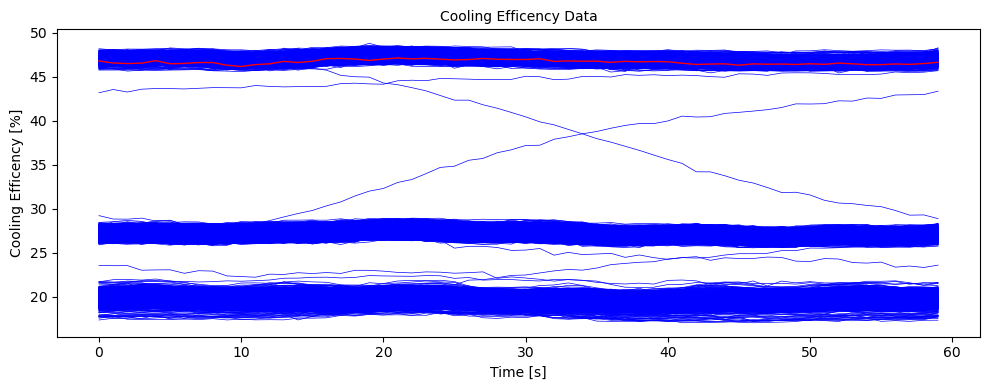

In [59]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['ce'].shape[0] - 1):
    ax.plot(data['ce'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['ce'].iloc[-1], color='red', linewidth=1, label='Last Series')

ax.set_title('Cooling Efficency Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Cooling Efficency [%]")

plt.tight_layout()
plt.show()

<h2>CP Sensor (1 Hz)</h2>

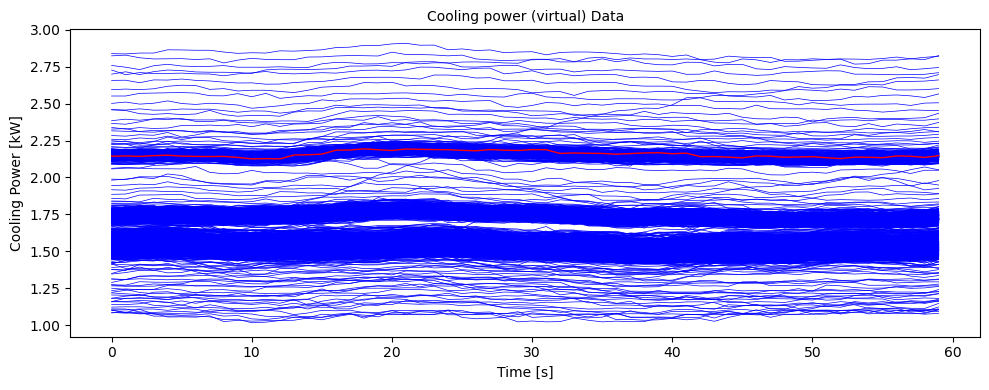

In [60]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['cp'].shape[0] - 1):
    ax.plot(data['cp'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['cp'].iloc[-1], color='red', linewidth=1, label='Last Series')

ax.set_title('Cooling power (virtual) Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Cooling Power [kW]")

plt.tight_layout()
plt.show()

<h2>VS Sensor (1 Hz)</h2>

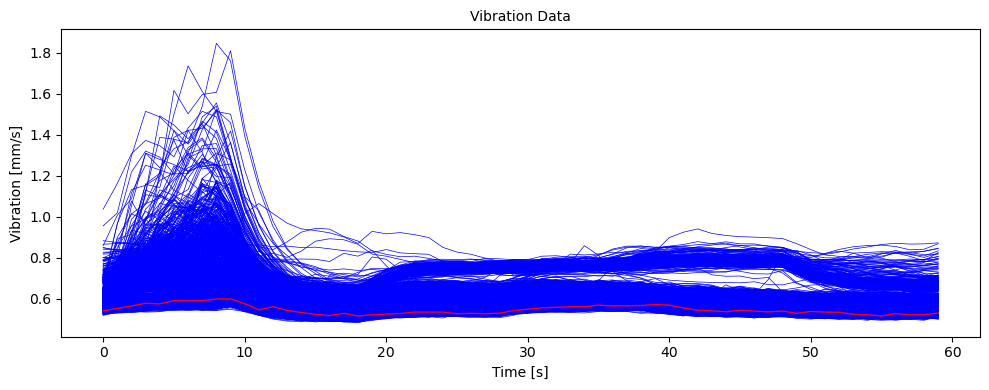

In [64]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['vs1'].shape[0] - 1):
    ax.plot(data['vs1'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['vs1'].iloc[-1], color='red', linewidth=1, label='Last Series')

ax.set_title('Vibration Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Vibration [mm/s]")

plt.tight_layout()
plt.show()

In [ ]:
#Ausreiser entfernen
remove_row = data['vs1'][np.any(data['vs1'].values > 2.0, axis=1)]
data['vs1'] = data['vs1'].drop(remove_row.index)

<h2>SE Sensor (1 Hz)</h2>

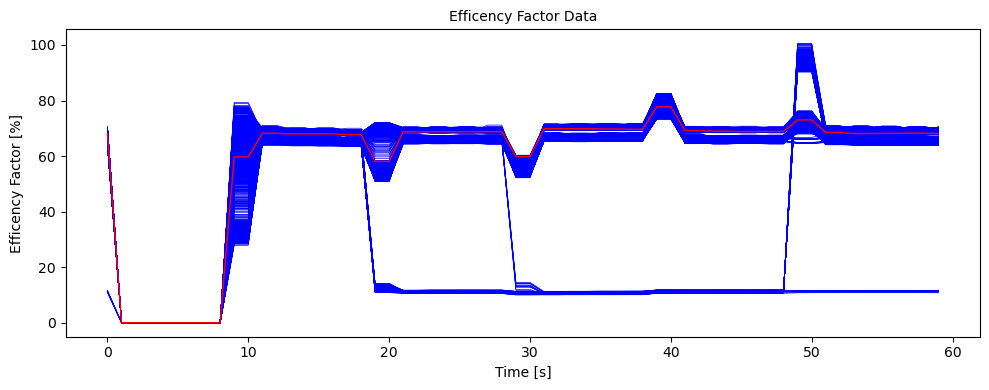

In [94]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['se'].shape[0] - 1):
    ax.plot(data['se'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['se'].iloc[-1], color='red', linewidth=1, label='Last Series')

ax.set_title('Efficency Factor Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Efficency Factor [%]")

plt.tight_layout()
plt.show()

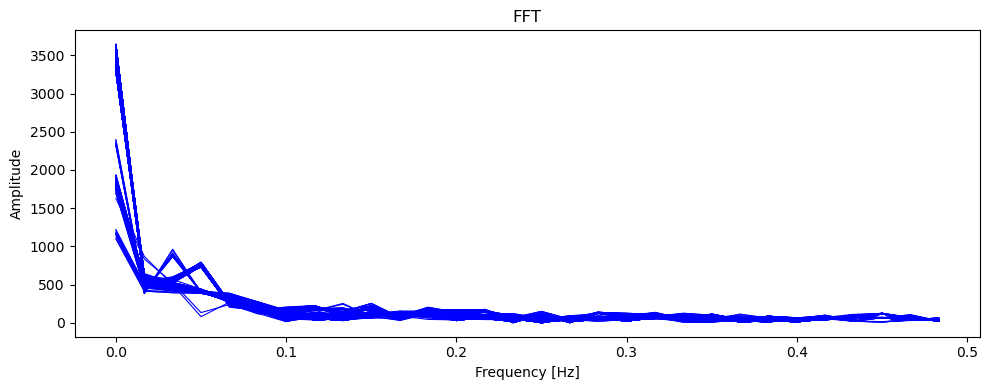

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Angenommene Sampling-Rate (diese muss an deine tatsächlichen Daten angepasst werden)
sampling_rate = 1  # Beispiel: 1 Hz Sampling-Rate, anpassen, falls notwendig

# Erstelle das Plot für die FFTs aller Serien
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

# Berechne und plotte die FFT für jede Zeitreihe
for i in range(data['se'].shape[0]):
    time_series = data['se'].iloc[i].values
    fft_values = np.fft.fft(time_series)
    frequencies = np.fft.fftfreq(len(time_series), d=sampling_rate)
    
    # Nur den positiven Frequenzbereich behalten
    positive_frequencies = frequencies[:len(frequencies) // 2]
    positive_fft_values = np.abs(fft_values[:len(fft_values) // 2])
    
    ax.plot(positive_frequencies, positive_fft_values, color = 'blue', linewidth=0.8)

# Einstellungen für das Plot
ax.set_title('FFT', fontsize=12)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
plt.tight_layout()
plt.show()


<h2>TS Sensors (1 Hz)</h2>

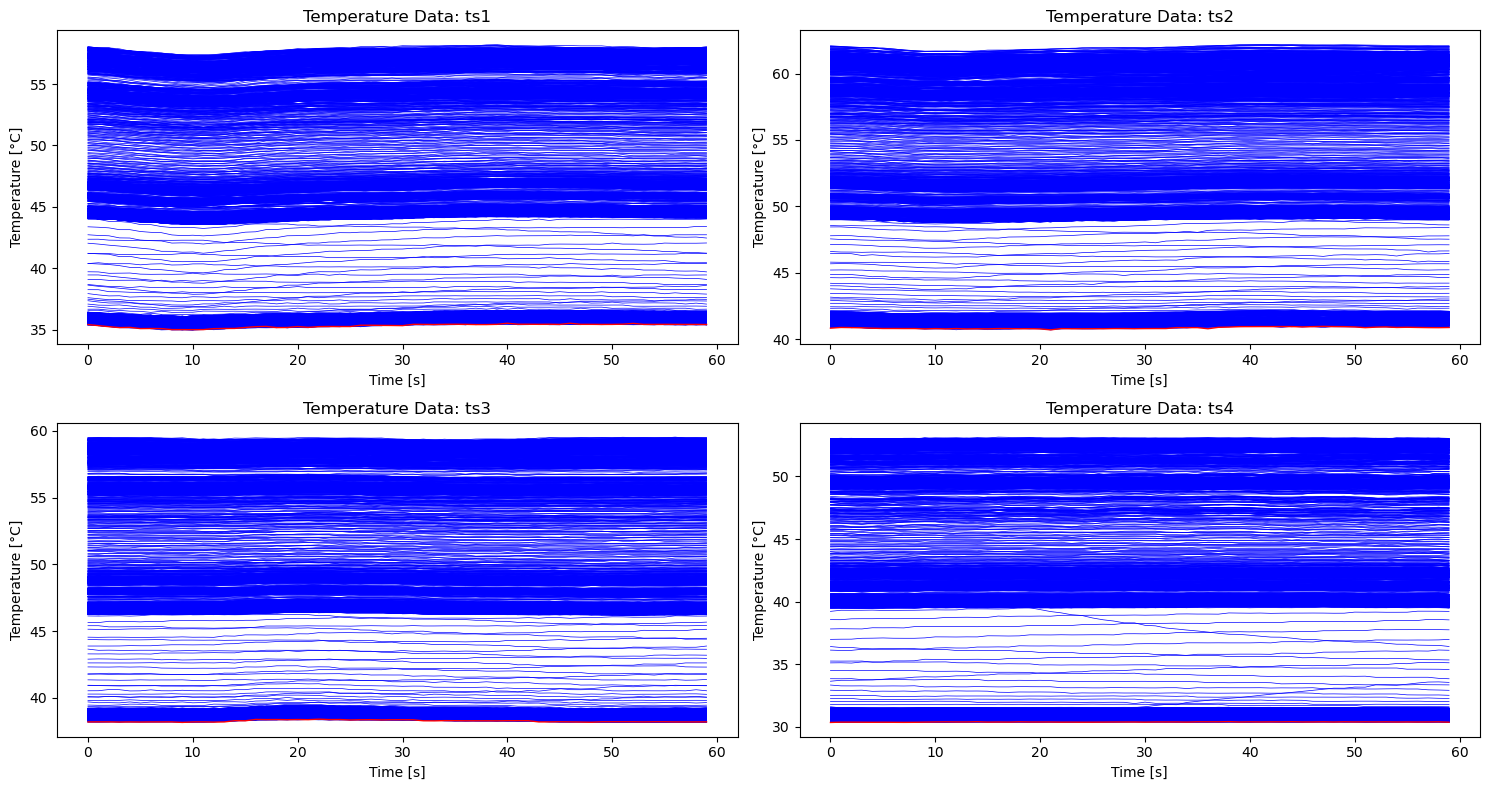

In [17]:
temp_sensors = ['ts1', 'ts2', 'ts3', 'ts4']

fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
axes = axes.flatten()

for idx, s in enumerate(temp_sensors):
    ax = axes[idx]
    for i in range(data[s].shape[0] - 1):
        ax.plot(data[s].iloc[i], color='blue', linewidth=0.5)
    ax.plot(data[s].iloc[-1], color='red', linewidth=1)
    
    ax.set_title(f"Temperature Data: {s}")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Temperature [°C]")

plt.tight_layout()
plt.show()

<h2>FS Sensors (10 Hz)</h2>

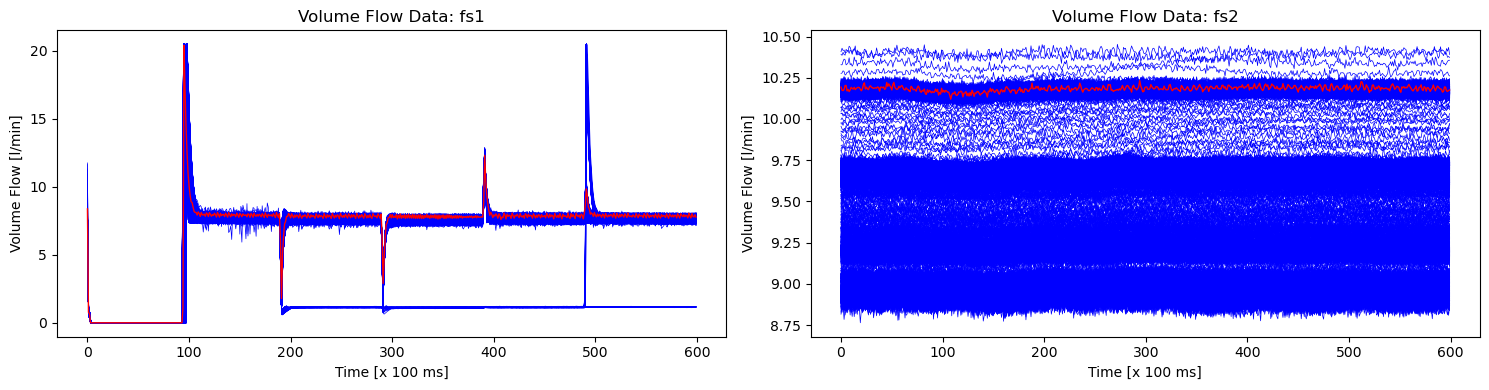

In [18]:
vf_sensors = ['fs1', 'fs2']

fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axes = axes.flatten()

for idx, s in enumerate(vf_sensors):
    ax = axes[idx]
    for i in range(data[s].shape[0] - 1):
        ax.plot(data[s].iloc[i], color='blue', linewidth=0.5)
    ax.plot(data[s].iloc[-1], color='red', linewidth=1)
    
    ax.set_title(f"Volume Flow Data: {s}")
    ax.set_xlabel("Time [x 100 ms]")
    ax.set_ylabel("Volume Flow [l/min]")

plt.tight_layout()
plt.show()

<h2>EPS Sensor (100 Hz)</h2>

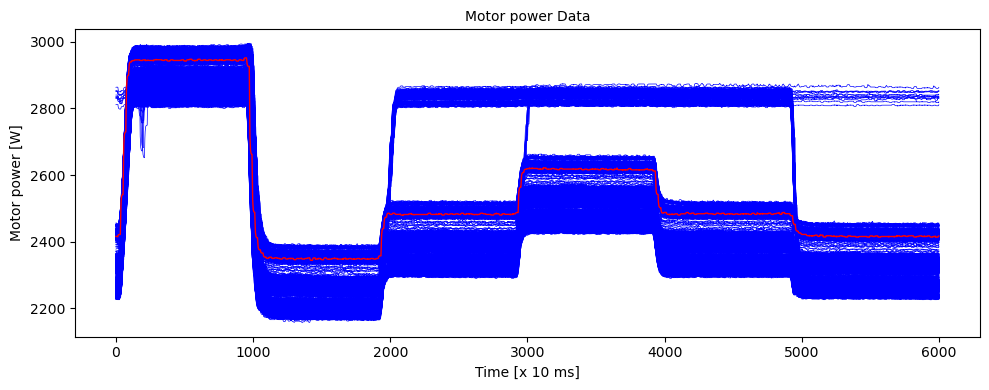

In [93]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
for i in range(data['eps1'].shape[0] - 1):
    ax.plot(data['eps1'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['eps1'].iloc[-1], color='red', linewidth=1, label='Last Series')

ax.set_title('Motor power Data', fontsize=10)
plt.xlabel("Time [x 10 ms]")
plt.ylabel("Motor power [W]")

plt.tight_layout()
plt.show()

In [92]:
#Ausreiser entfernen
remove_row = data['eps1'][np.any(data['eps1'].values < 2150, axis=1)]
remove_row
data['eps1'] = data['eps1'].drop(remove_row.index)

<h2>PS Sensors (100 Hz)</h2>

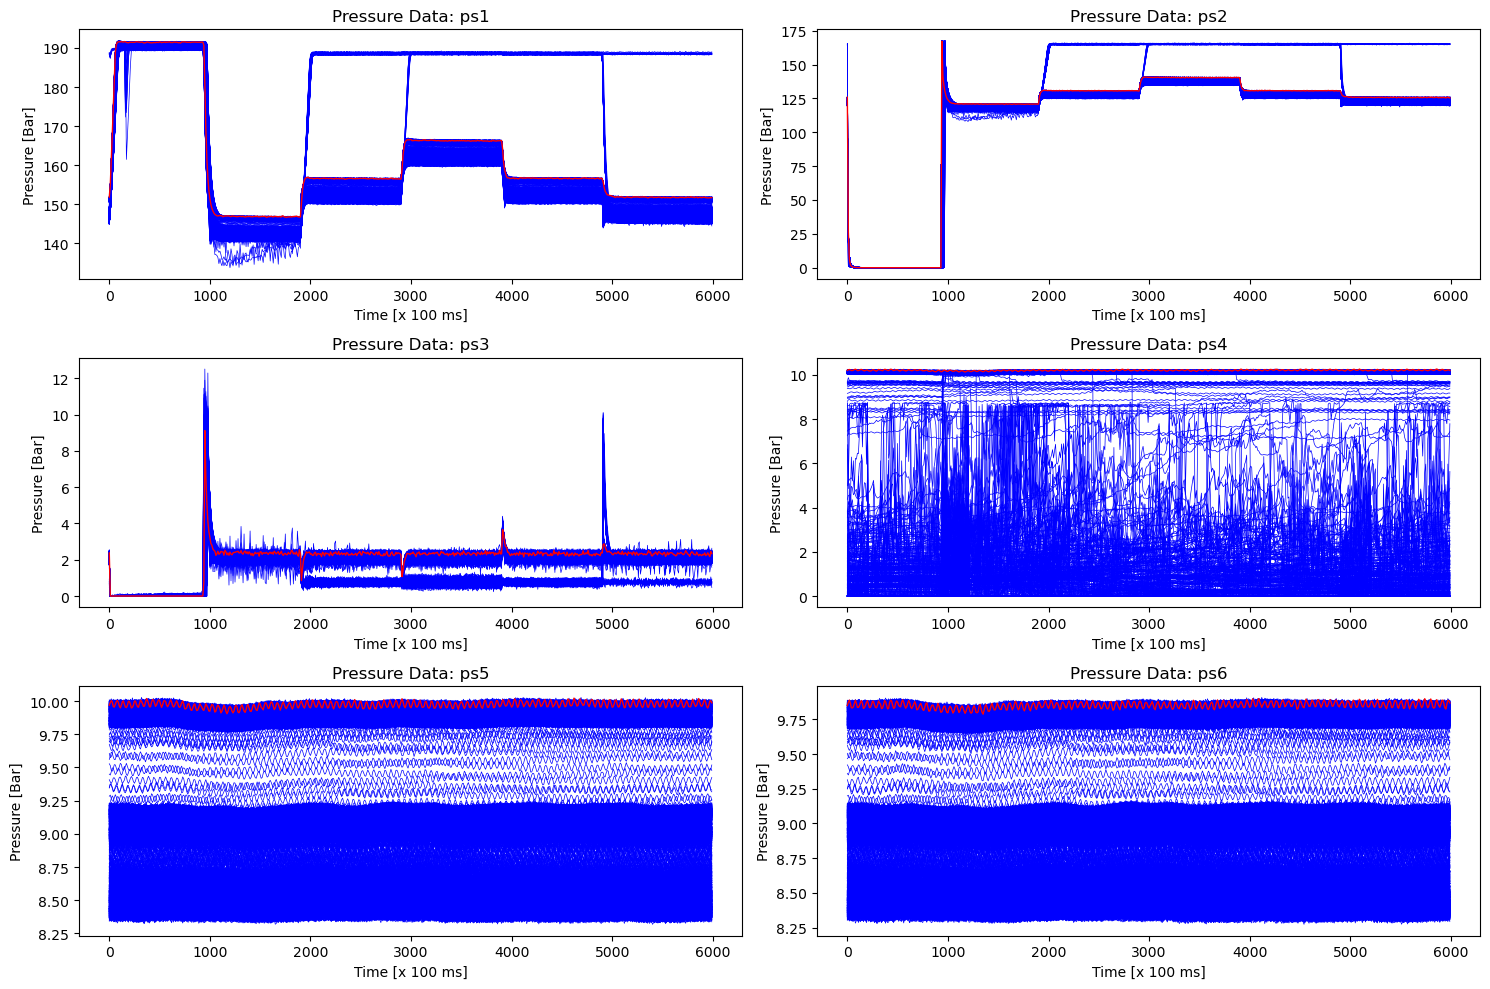

In [ ]:
ps_sensors = ['ps1', 'ps2', 'ps3', 'ps4', 'ps5', 'ps6']

fig, axes = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
axes = axes.flatten()

for idx, s in enumerate(ps_sensors):
    ax = axes[idx]
    
    # Nur jede 10. Spalte auswählen
    reduced_data = data[s].iloc[:, ::10]
    
    for i in range(reduced_data.shape[0] - 1):
        ax.plot(reduced_data.iloc[i], color='blue', linewidth=0.5)
    
    ax.plot(reduced_data.iloc[-1], color='red', linewidth=1)
    
    ax.set_title(f"Pressure Data: {s}")
    ax.set_xlabel("Time [x 100 ms]")
    ax.set_ylabel("Pressure [Bar]")

plt.tight_layout()
plt.show()


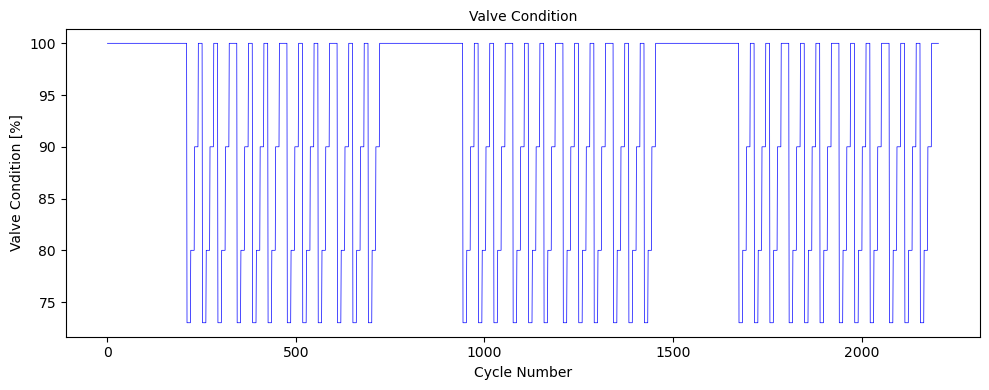

In [41]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

ax.plot(df_target, color='blue', linewidth=0.5)

ax.set_title('Valve Condition', fontsize=10)
plt.xlabel("Cycle Number")
plt.ylabel("Valve Condition [%]")

plt.tight_layout()
plt.show()

In [42]:
correlation_matrix = data['ps2'].corrwith(df_target)

# Anzeigen der Korrelationen
print(correlation_matrix)

0      -0.001748
1      -0.001670
2      -0.001882
3      -0.008091
4      -0.021843
          ...   
5995    0.002343
5996    0.001603
5997    0.000553
5998    0.000337
5999   -0.000335
Length: 6000, dtype: float64
